# Cleaning Modes With Rational Filters

In [98]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [99]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
import qnm
from gwpy.timeseries import TimeSeries
import copy
from scipy.special import logsumexp
import astropy.constants as c

In [100]:
data = np.loadtxt('./results/data_snrPoints=50_realisations=100_lowres.txt')

In [101]:
[med_snr, med_bayes, std_bayes] = data

In [102]:
# Fix integrated version - make sure resolution is good enough 
# increase sample size and wide enough parameter space
# Randomise mass and spin

In [103]:
raw_data = np.loadtxt('./results/rawData_snrPoints=50_realisations=100_lowres.txt')

In [104]:
realisation_snr = np.reshape(raw_data[0], (100, 50))
realisation_bayes = np.reshape(raw_data[1], (100, 50))

In [105]:
fits = np.array([np.polyfit(realisation_snr[i,], realisation_bayes[i], deg=1)
                   for i in range(len(realisation_snr))])
slope = np.median(fits[:,0])
slope_err = np.std(fits[:,0])

Text(1.25, 1.25, 'Slope = 2.020 $\\pm$ 0.012')

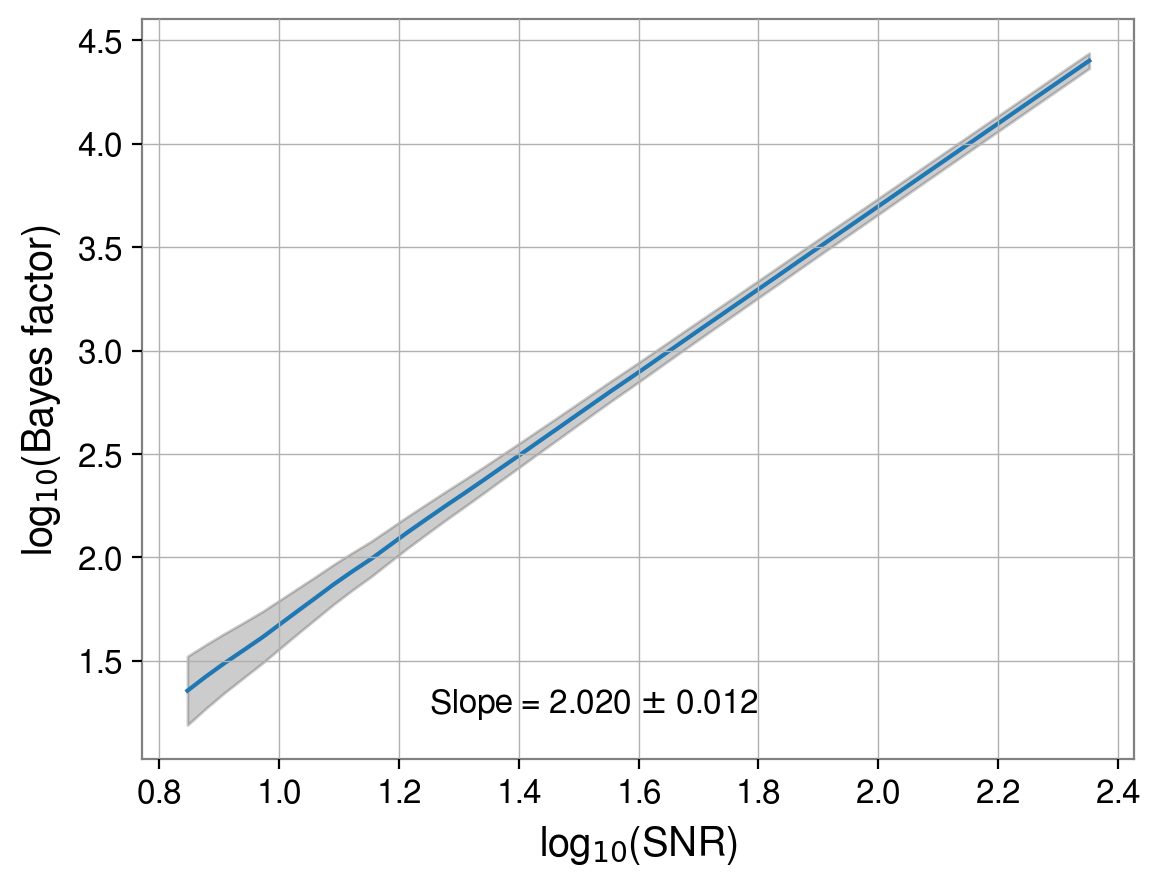

In [106]:
pl.plot(med_snr,med_bayes)
pl.fill_between(med_snr, 
                med_bayes-std_bayes, med_bayes+std_bayes,
               alpha = 0.2, color = 'k')
pl.xlabel("log$_{10}$(SNR)")
pl.ylabel("log$_{10}$(Bayes factor)")
pl.text(1.25, 1.25, 'Slope = %.3f $\pm$ %.3f' % (slope, slope_err))

In [107]:
np.median(fits[:,1])

-0.3411094855113004

In [108]:
np.std(fits[:,1])

0.023185316557946284

## Wrong modes

In [88]:
raw_data = np.loadtxt('./results/wrong_modes/220+221_rawData_snrPoints=50_realisations=100_lowres.txt')

In [90]:
realisation_snr = np.reshape(raw_data[0], (50, 100))
realisation_bayes = np.reshape(raw_data[1], (50, 100))

In [91]:
fits = np.array([np.polyfit(realisation_snr[i], realisation_bayes[i], deg=1)
                   for i in range(len(realisation_snr))])

In [92]:
slope = np.median(fits[:,0])
slope_err = np.std(fits[:,0])

In [93]:
data = np.loadtxt('./results/wrong_modes/220+221_data_snrPoints=50_realisations=100_lowres.txt')

In [94]:
[med_snr, med_bayes, std_bayes] = data

Text(1.25, 1.25, 'Slope = 2.01 $\\pm$ 0.00')

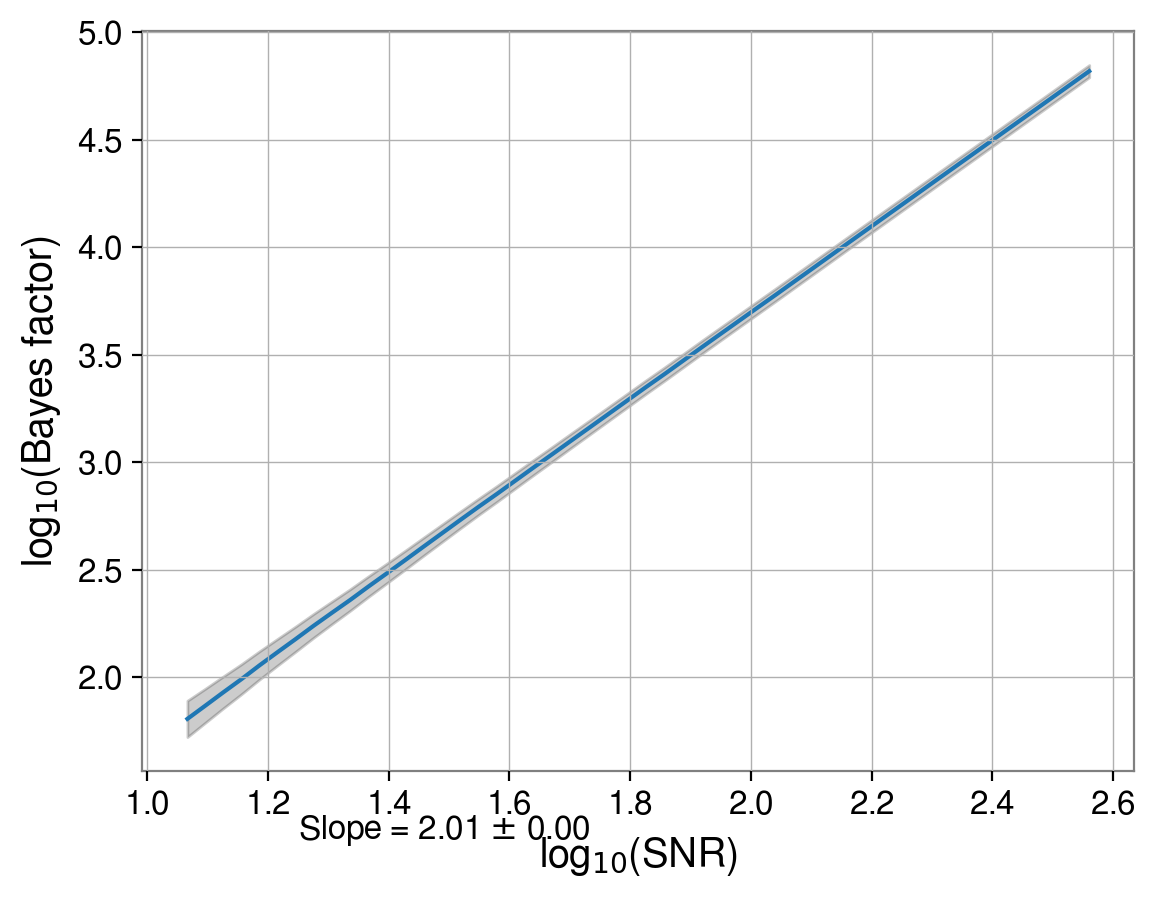

In [95]:
pl.plot(med_snr,med_bayes)
pl.fill_between(med_snr, 
                med_bayes-std_bayes, med_bayes+std_bayes,
               alpha = 0.2, color = 'k')
pl.xlabel("log$_{10}$(SNR)")
pl.ylabel("log$_{10}$(Bayes factor)")
pl.text(1.25, 1.25, 'Slope = %.2f $\pm$ %.2f' % (slope, slope_err))

In [96]:
np.median(fits[:,1])

-0.3232581309388083

In [97]:
np.std(fits[:,1])

0.007289520635425532